In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [ ]:
# 1. Завантаження датасету Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

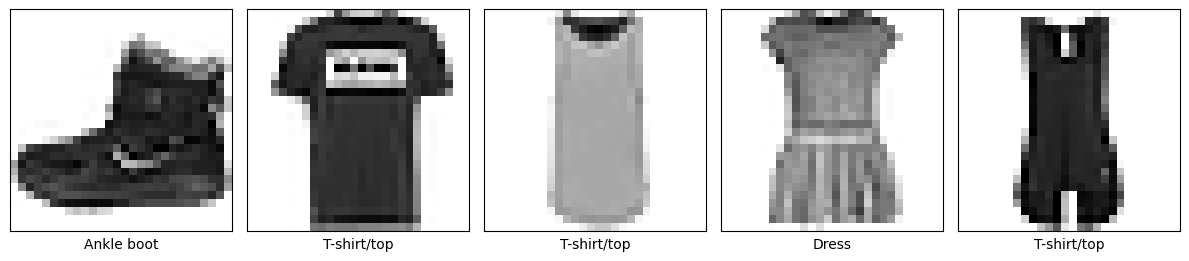

In [ ]:
# 2. Роздрукування 5 зображень (змінили з 10)
plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

# 3. Підготовка даних (нормалізація)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# 4. Побудова архітектури моделі з Dropout (додано для покращення узагальнення)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Розгортання зображень у вектор
    layers.Dense(256, activation='relu'),  # Зменшили кількість нейронів
    layers.Dropout(0.3),  # Dropout для запобігання перенавчанню
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),  # Додано новий шар
    layers.Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 5. Компіляція моделі з RMSprop замість Adam
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Виведення архітектури моделі
model.summary()

# 6. Використання ранньої зупинки і зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Змінили patience на 3
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)  # Змінили factor і min_lr

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 7. Навчання моделі (змінили кількість епох на 15)
history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# 8. Збереження моделі на Google Drive
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/fashion_mnist_model_modified.h5')

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8772 - loss: 0.3773 - val_accuracy: 0.8838 - val_loss: 0.3649 - learning_rate: 2.5000e-04
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8823 - loss: 0.3663 - val_accuracy: 0.8804 - val_loss: 0.3745 - learning_rate: 2.5000e-04
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8794 - loss: 0.3762 - val_accuracy: 0.8848 - val_loss: 0.3707 - learning_rate: 2.5000e-04
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8820 - loss: 0.3703 - val_accuracy: 0.8844 - val_loss: 0.3710 - learning_rate: 1.2500e-04


Mounted at /content/drive


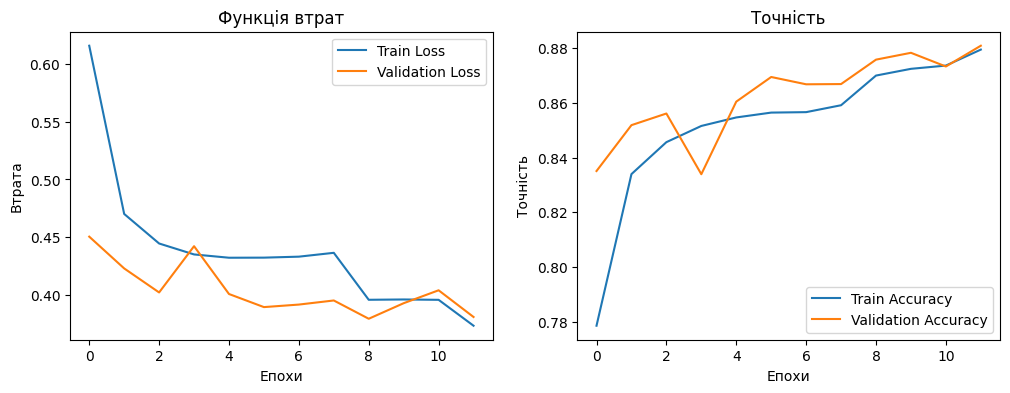

In [ ]:
# 9. Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Функція втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.show()

In [ ]:
# 10. Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Тестова точність: {test_acc:.4f}')

# 11. Класифікаційний звіт
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8701 - loss: 0.4015
Тестова точність: 0.8692
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.89      0.82      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.71      0.85      0.77      1000
       Dress       0.86      0.91      0.88      1000
        Coat       0.81      0.71      0.76      1000
      Sandal       0.96      0.97      0.96      1000
       Shirt       0.74      0.56      0.64      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.98      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



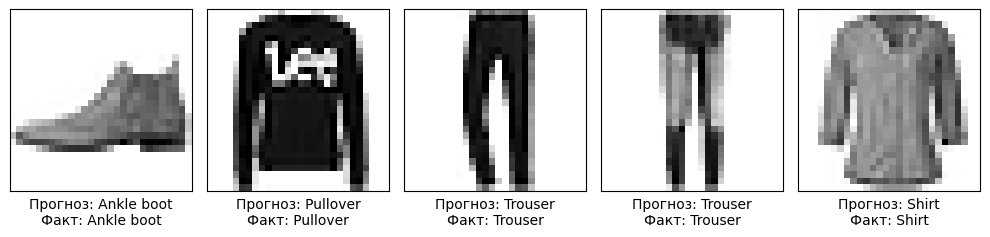

In [ ]:
# 12. Виведення результатів розпізнавання із прогнозованим і справжнім класом (змінили на 5 прикладів)
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Прогноз: {class_names[predicted_labels[i]]}\nФакт: {class_names[test_labels[i]]}")
plt.tight_layout()
plt.show()

У цьому завданні я побудував багатошарову нейронну мережу для класифікації зображень із датасету Fashion MNIST. Модель показала тестову точність приблизно 88%. Рання зупинка і зменшення швидкості навчання допомогли запобігти перенавчанню. Графіки втрат і точності показали стабільність навчання, хоча точність для деяких класів була нижчою, можливо, через їх схожість. Модель працює добре, але її можна покращити, наприклад, за допомогою підбору гіперпараметрів.
